# Pen Spring Diffraction Experiment
In this experiment, we illustrate the diffraction of a pen spring (a regular helix) and discuss its implications.

We will first import some standard Python libraries that will allow us to math our way out of this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%config InlineBackend.figure_format = 'retina' #for Hi-DPI screens

def sinc(x):
    if (x != 0):
        # Prevent divide-by-zero
        return np.sin(np.pi * x) / (np. pi * x)
    else:
        return 1
sinc = np.vectorize(sinc)

### Experiment Variables
Change the variables here to match your apparatus. Units are given in **microns**.

In [2]:
slitWidth    = 2550      # 2.55mm
wavelength   = 0.650     # 650nm
propDistance = 10.07**7  # 10m

### Results
Measure the distance from the center to the *n*-th maxima (choose any reasonable number!)

Change the variable here to match your result in **mm**. It will be plotted on the visualisation later on.

In [3]:
result_mm = 25.5

# Visualising a Single-slit Diffraction
We will first set up some parameters, and then proceed to plot the intensity over distance from the center of the pattern.

### Parameters and Equation

In [4]:
amplitude = 5 # the power of the laser (mW)
x = np.arange(-50000, 50000, 10) # limits and resolution of the graph (micron)
F = sinc(slitWidth * x / wavelength / propDistance)
I = amplitude / (wavelength * propDistance) * (slitWidth * F)**2

### Plot the graph
See if the blue line indeed corresponds to the maxima from which you measured earlier on

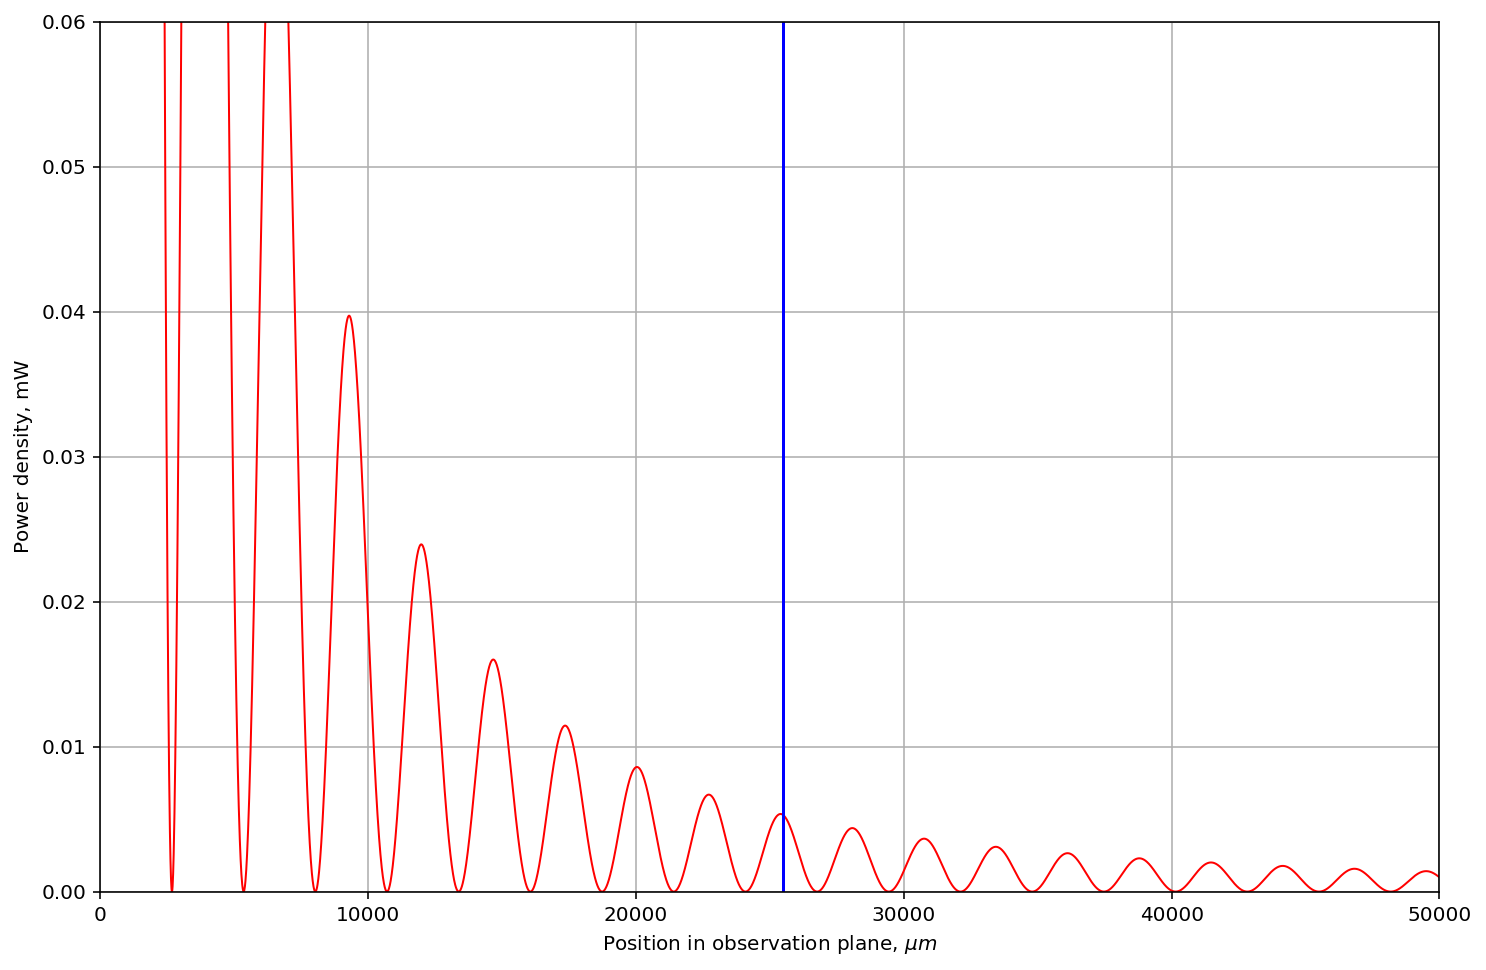

In [5]:
plt.figure(1, (12,8))
plt.plot(x, I, linewidth = 1, color='r') # red indicates the intensity
result = result_mm * 1000
plt.axvline(x=result, color='b') # blue indicated your result indicated earlier
plt.xlim((0, 50000))
plt.ylim((0, 0.06))
plt.xlabel(r'Position in observation plane, $\mu m$')
plt.ylabel('Power density, mW')
plt.grid(True)
plt.show()

# Visualising the Actual Diffraction Pattern
Now, we shall see if we can replicate the pattern seen by you, and thus validate our math and stuff (lol)

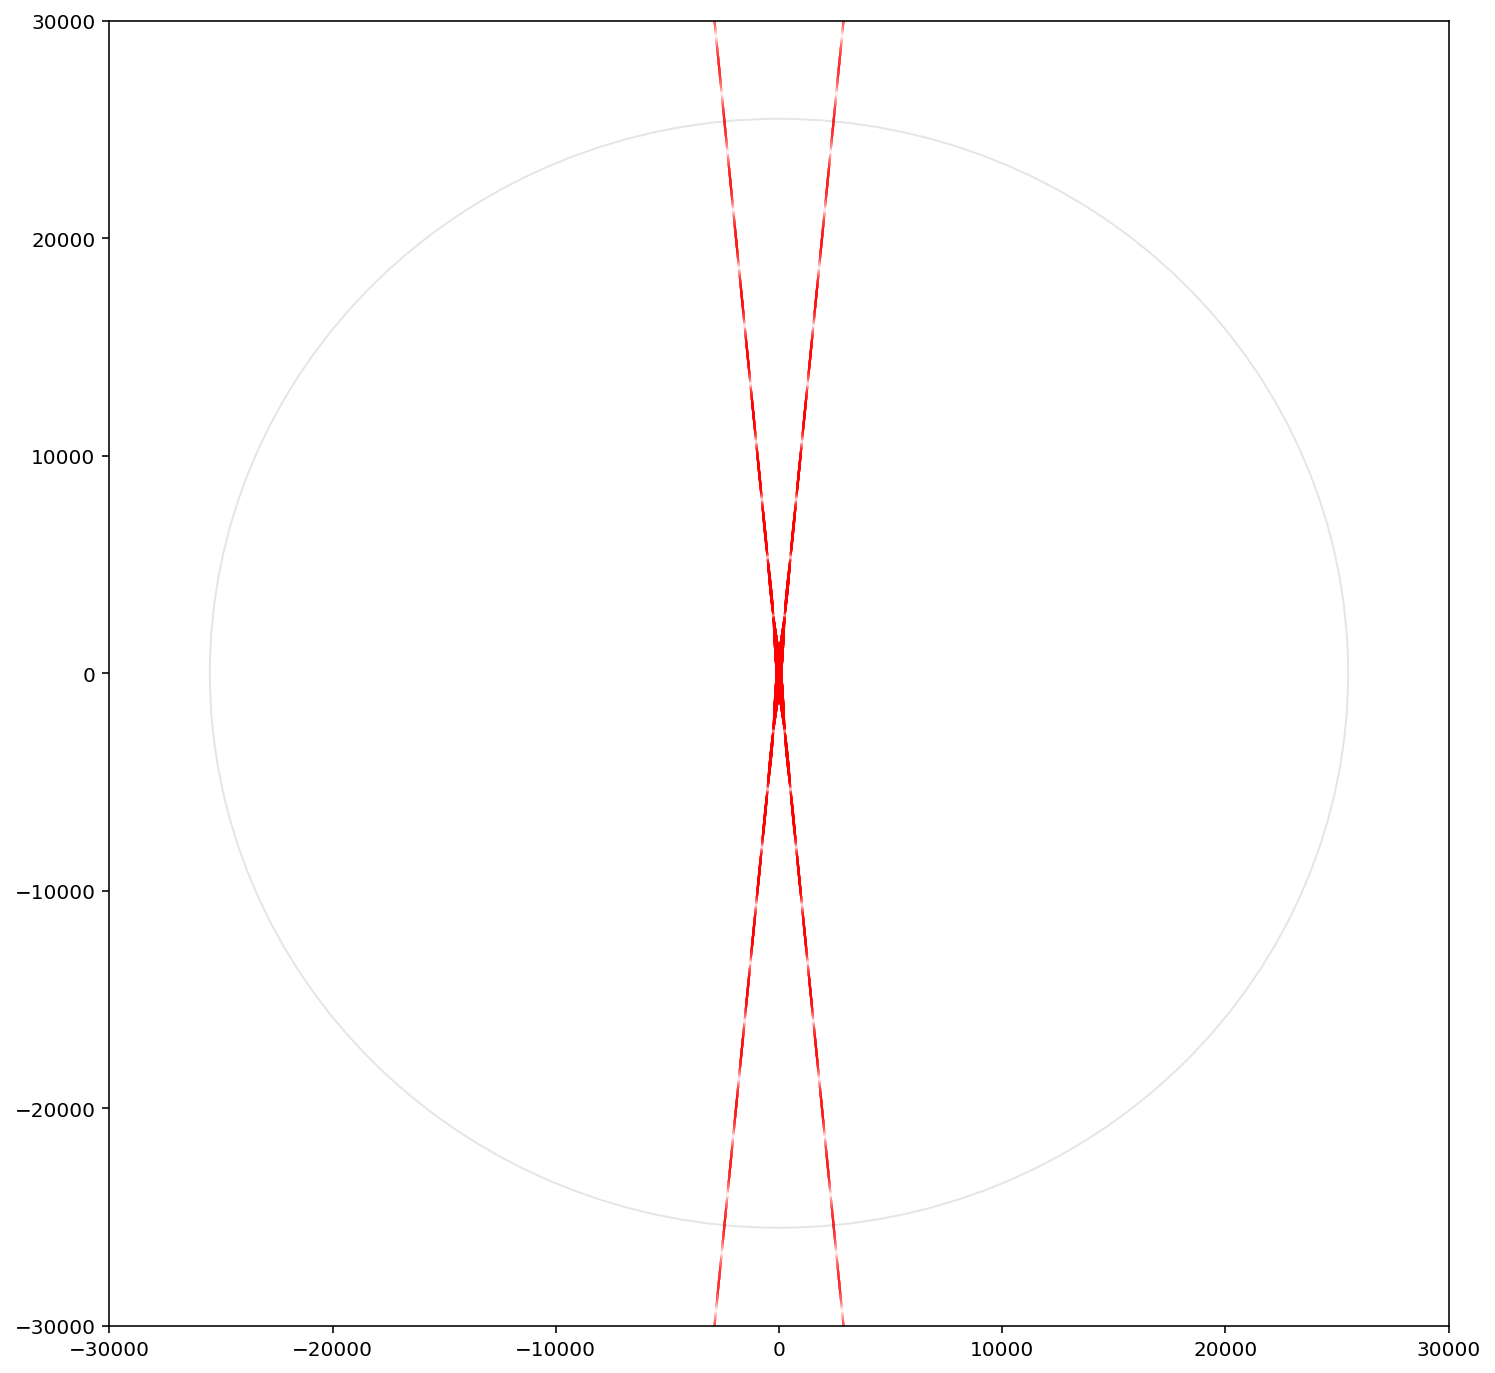

In [6]:
angle_deg = 84.5
angle = math.radians(angle_deg)

plt.figure(1, (12,12))

x_tf = ( x / math.sqrt((math.tan(angle))**2 + 1) )
y_tf = x_tf * math.tan(angle)
plt.scatter(x_tf, y_tf, color='r', s=I,alpha=1)

y_tf = x_tf * math.tan(-angle)
plt.scatter(x_tf, y_tf, color='r', s=I,alpha=1)

ax = plt.gca()
circle_result = plt.Circle((0, 0), result, color='k', fill=False, alpha = 0.1)
ax.add_artist(circle_result)

plt.xlim((-30000, 30000))
plt.ylim((-30000, 30000))
plt.show()

#### This is the zoomed-in version for us blind people

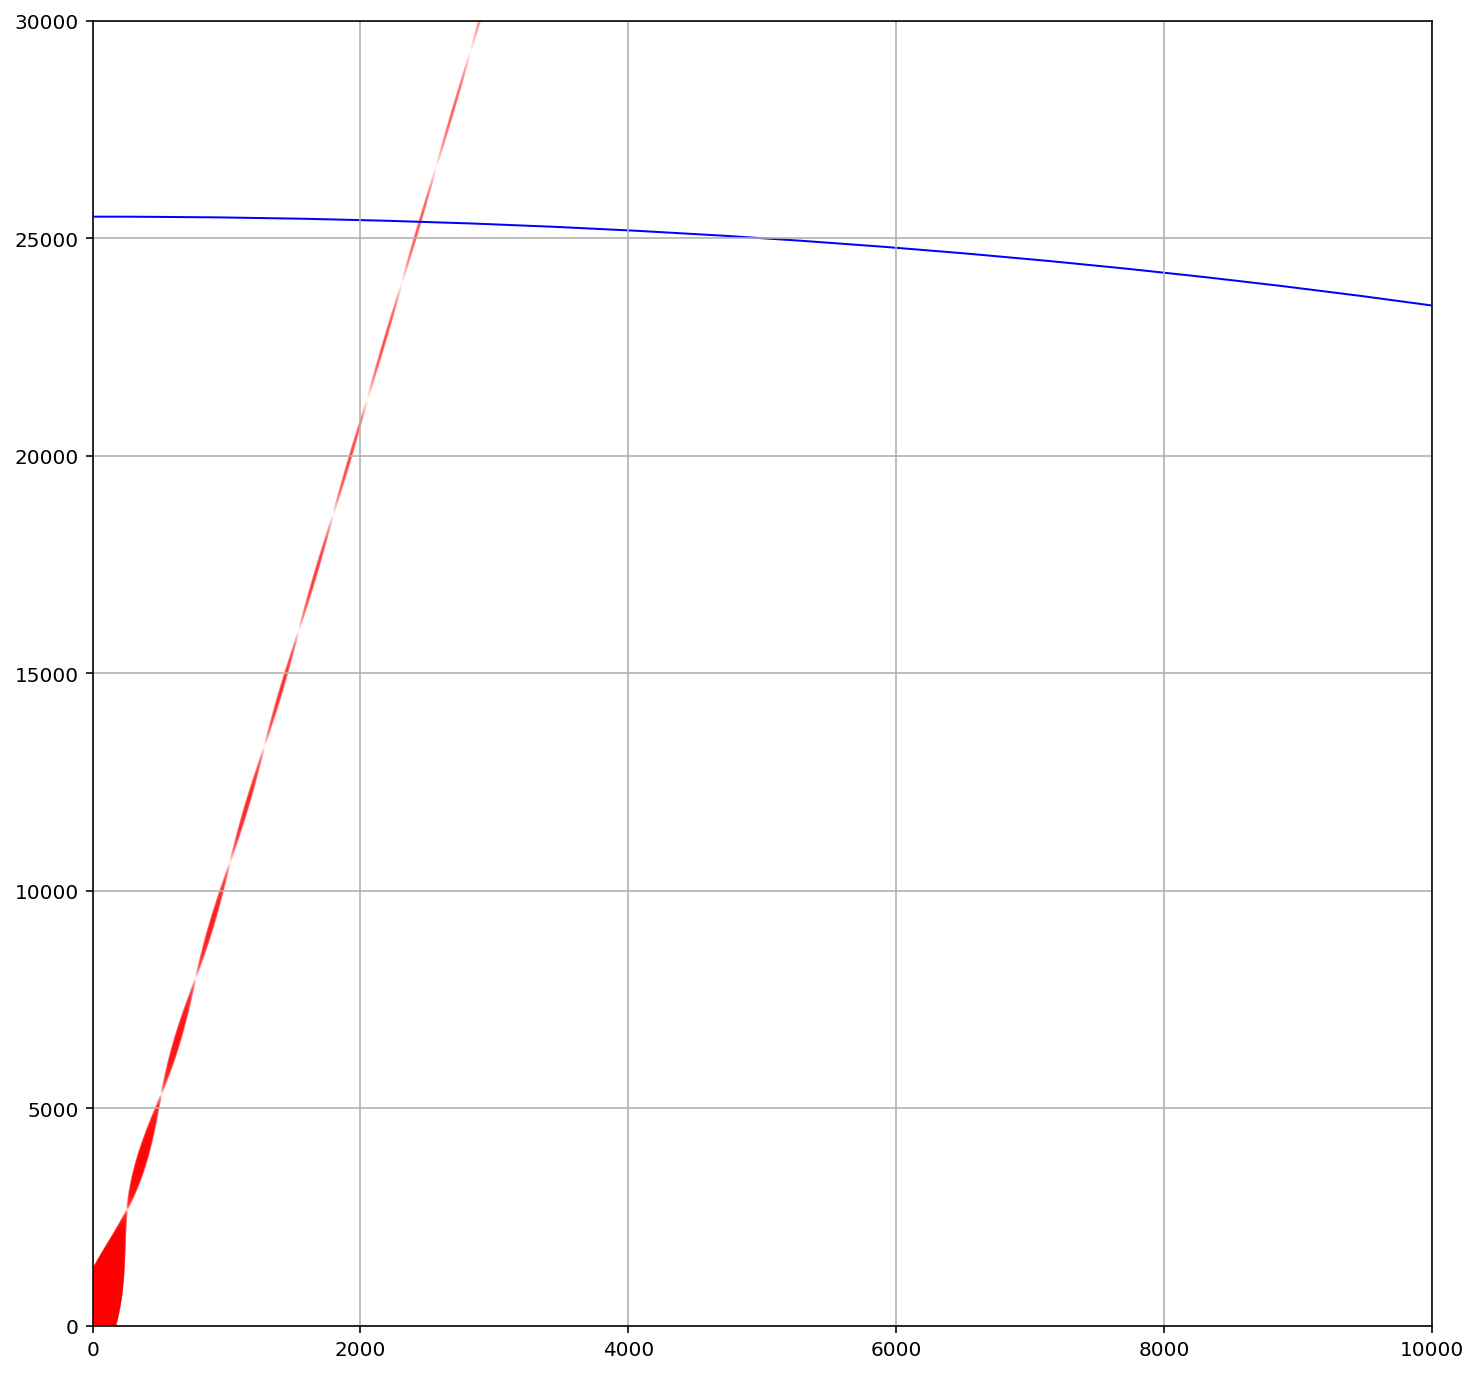

In [7]:
plt.figure(2, (12,12))

x_tf = ( x / math.sqrt((math.tan(angle))**2 + 1) )
y_tf = x_tf * math.tan(angle)
plt.scatter(x_tf, y_tf, color='r', s=I*100,alpha=0.1)

ax = plt.gca()
circle_result = plt.Circle((0, 0), result, color='b', fill=False, alpha = 1)
ax.add_artist(circle_result)

plt.xlim((0, 10000))
plt.ylim((0, 30000))
plt.grid(True)
plt.show()

Singapore got high rate of myopia